In [43]:
import numpy as np 
import pandas as pd 
import matplotlib. pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [44]:
ec = pd.read_csv('/content/drive/MyDrive/Datasets/ecom/ecommerce-data.csv')

In [45]:
ec.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [46]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


To enhance the productivity of working with the 'InvoiceDate' column, we are converting it into a datetime object. This enables us to extract specific time components such as year, day, month, and so on.

In [47]:
ec['InvoiceDate']= ec['InvoiceDate'].astype('datetime64[ns]')

Generating a new column called 'InvoiceYear' to organize the data by year.

In [48]:
ec['InvoiceYear'] = ec['InvoiceDate'].dt.year

In [49]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   InvoiceYear  541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


We only have invoices from two distinct years in our dataset -- this is a crucial piece of information.

In [50]:
ec['InvoiceYear'].unique()

array([2010, 2011])

Create separate columns for day, hour, and month.

In [51]:
ec['InvoiceDay'] = ec['InvoiceDate'].dt.isocalendar().day
ec['InvoiceHour'] = ec['InvoiceDate'].dt.hour
ec['InvoiceMonth'] = ec['InvoiceDate'].dt.month

*   Visualizing year, day, month and hour of the orders.
*   Important information 2. -- Majority of the orders are from 2011.
*   Important information 3. -- There is not a significant variation in the invoice dates, although we can see that there are no invoices for Saturdays.
*   Important information 4. -- Our highest sales are in November, followed by December. This could be due to Black Friday and Christmas.

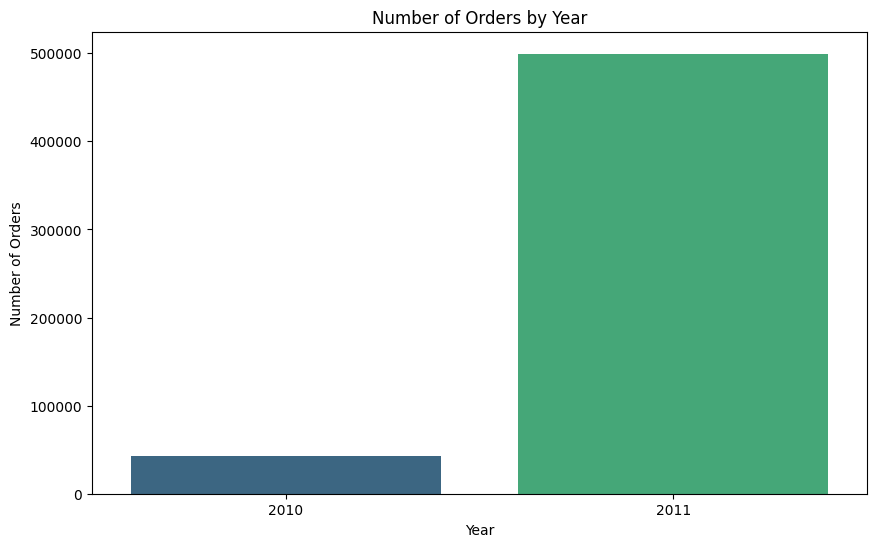

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(data= ec, x= 'InvoiceYear', palette='viridis')
plt.title('Number of Orders by Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.show()

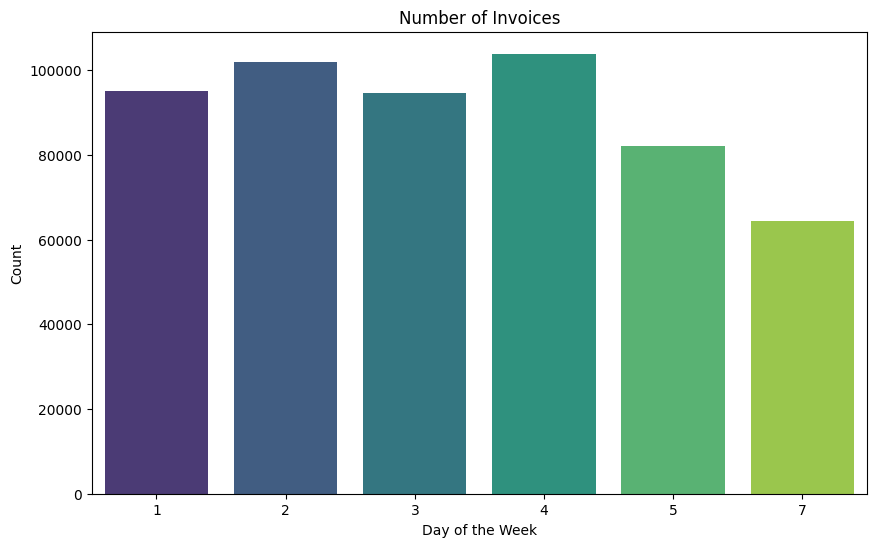

In [53]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=ec, x='InvoiceDay' , palette='viridis')
ax.set_title('Number of Invoices')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Count')
plt.show()

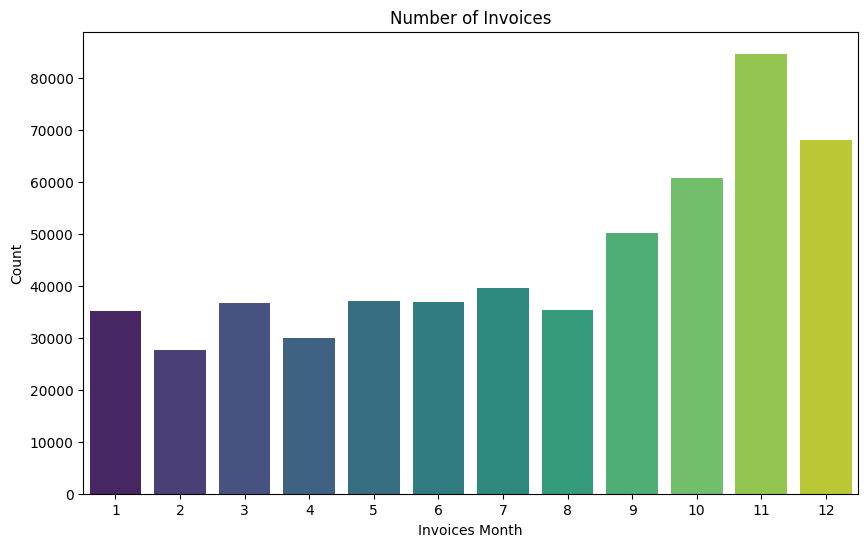

In [54]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=ec, x='InvoiceMonth' , palette='viridis')
ax.set_title('Number of Invoices')
ax.set_xlabel('Invoices Month')
ax.set_ylabel('Count')
plt.show()

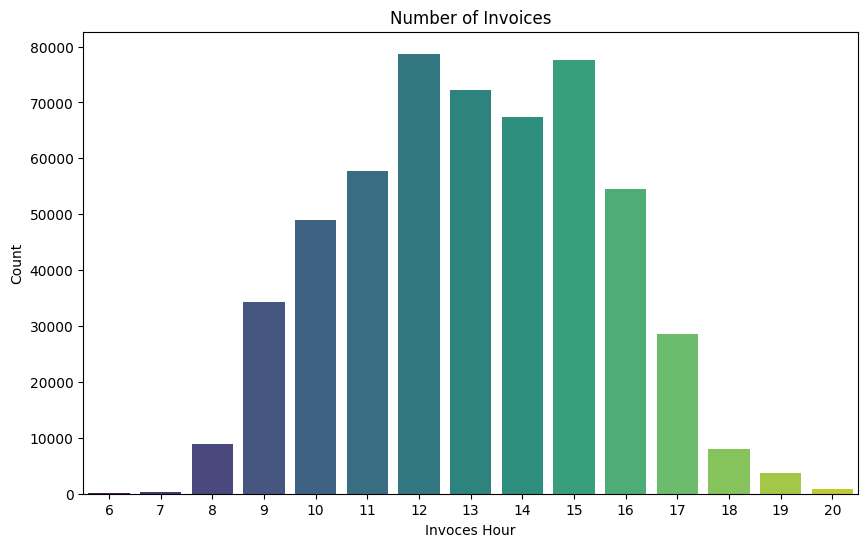

In [55]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=ec, x='InvoiceHour' , palette='viridis')
ax.set_title('Number of Invoices')
ax.set_xlabel('Invoces Hour')
ax.set_ylabel('Count')
plt.show()

In [56]:
ec.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceDay,InvoiceHour,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,3,8,12


We are examining the data types of our columns and the number of unique variables for each column. There are some object type columns that we will not use in our analysis. Instead of dropping them, we will create a sub_dataframe containing only the columns we need.

In [57]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       541909 non-null  object        
 8   InvoiceYear   541909 non-null  int64         
 9   InvoiceDay    541909 non-null  UInt32        
 10  InvoiceHour   541909 non-null  int64         
 11  InvoiceMonth  541909 non-null  int64         
dtypes: UInt32(1), datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 48.1+ MB


In [58]:
ec.nunique()

InvoiceNo       25900
StockCode        4070
Description      4223
Quantity          722
InvoiceDate     23260
UnitPrice        1630
CustomerID       4372
Country            38
InvoiceYear         2
InvoiceDay          6
InvoiceHour        15
InvoiceMonth       12
dtype: int64

In [59]:
ec.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceYear', 'InvoiceDay',
       'InvoiceHour', 'InvoiceMonth'],
      dtype='object')

In [60]:
sub_df = ec[['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'InvoiceYear', 'InvoiceDay','InvoiceHour',
              'InvoiceMonth']]

In [61]:
sub_df.head(10)

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceDay,InvoiceHour,InvoiceMonth
0,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,3,8,12
1,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,3,8,12
2,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,3,8,12
3,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,3,8,12
4,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,3,8,12
5,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010,3,8,12
6,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010,3,8,12
7,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,3,8,12
8,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,3,8,12
9,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010,3,8,12


In [62]:
percent_missing = ec['CustomerID'].isna().sum() * 100 / len(ec['CustomerID'])
print('Percentage of missing values in CustomerID column:', percent_missing)

Percentage of missing values in CustomerID column: 24.926694334288598


Examining the missing values. The Customer ID column has a significant number of missing values, accounting for nearly 25% of the total. Therefore, we cannot rely on this column for analysis.

In [63]:
sub_df.groupby(by='Country').sum()['Quantity'].sort_values(ascending=False)

<ipython-input-63-e9b4b9b68995>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub_df.groupby(by='Country').sum()['Quantity'].sort_values(ascending=False)


Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


The majority of orders in this dataset come from the United Kingdom, which may indicate that the dataset is biased towards this country. It could also suggest that the company is based in the UK or has a large customer base in the UK.

In [64]:
sub_df.groupby(by='Country').nunique()['CustomerID'].sort_values(ascending=False)

Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Israel                     4
Greece                     4
EIRE                       3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Lithuania                  1
Czech Republic             1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

We can observe the presence of NaN values in the data.

In [65]:
sub_df[sub_df['Country'] == 'Hong Kong']

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceDay,InvoiceHour,InvoiceMonth
69623,60,2011-01-24 14:24:00,1.25,NaN,Hong Kong,2011,1,14,1
69624,6,2011-01-24 14:24:00,3.75,NaN,Hong Kong,2011,1,14,1
69625,6,2011-01-24 14:24:00,3.75,NaN,Hong Kong,2011,1,14,1
69626,28,2011-01-24 14:24:00,0.21,NaN,Hong Kong,2011,1,14,1
69627,12,2011-01-24 14:24:00,0.85,NaN,Hong Kong,2011,1,14,1
...,...,...,...,...,...,...,...,...,...
423776,30,2011-10-28 08:20:00,2.95,NaN,Hong Kong,2011,5,8,10
423777,36,2011-10-28 08:20:00,0.65,NaN,Hong Kong,2011,5,8,10
423778,8,2011-10-28 08:20:00,3.75,NaN,Hong Kong,2011,5,8,10
465423,-1,2011-11-14 13:26:00,326.10,NaN,Hong Kong,2011,1,13,11


This code is a crucial piece of information about the customer countries by year difference, which indicates that the company has expanded its operations to different countries or received orders from them.

In [66]:
sub_df[sub_df['InvoiceYear'] == 2010]['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain'], dtype=object)

In [67]:
sub_df[sub_df['InvoiceYear'] == 2011]['Country'].unique()

array(['United Kingdom', 'Sweden', 'Italy', 'Portugal', 'France',
       'Belgium', 'Bahrain', 'Germany', 'EIRE', 'Australia', 'Spain',
       'Japan', 'Israel', 'Cyprus', 'Netherlands', 'Poland',
       'Switzerland', 'Finland', 'Greece', 'Hong Kong', 'Singapore',
       'Iceland', 'Channel Islands', 'Lebanon', 'Austria', 'Norway',
       'United Arab Emirates', 'Denmark', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)